In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [2]:
df = pd.read_csv(r'C:\Users\Sandeep Immadi\Downloads\bank_marketing_part1_Data.csv')
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [7]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [8]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [9]:
df.isna().values.sum()

0

In [10]:
df.shape

(210, 7)

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


<AxesSubplot:>

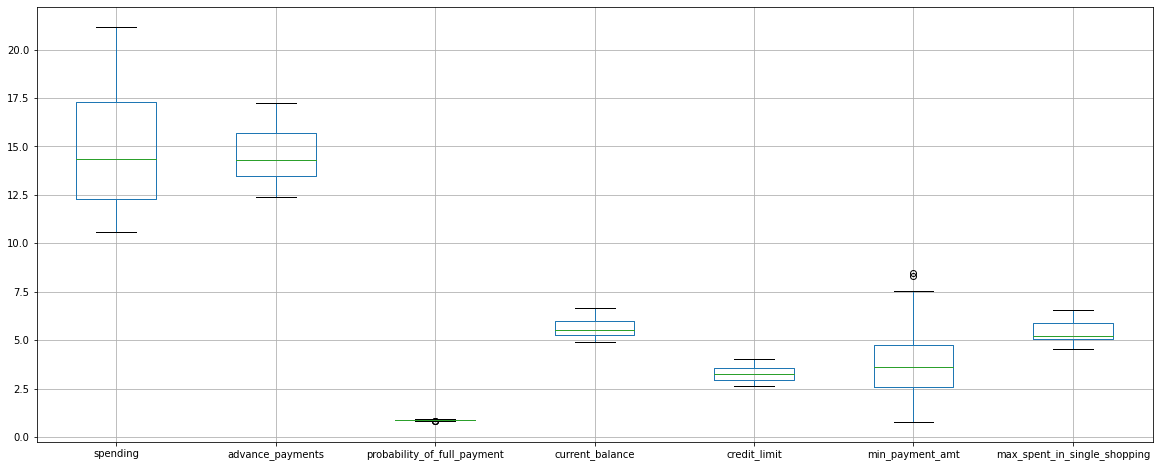

In [12]:
plt.figure(figsize = (20,8))
df.boxplot()

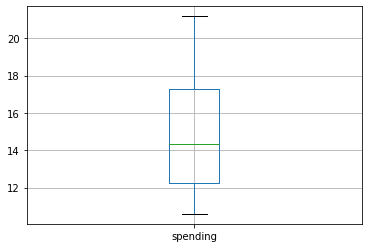

In [13]:
df.boxplot(column=['spending'])
plt.show()

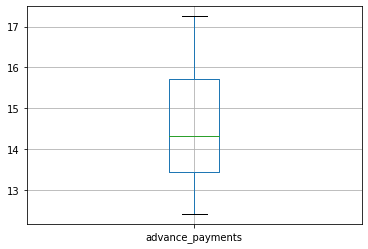

In [14]:
df.boxplot(column=['advance_payments'])
plt.show()

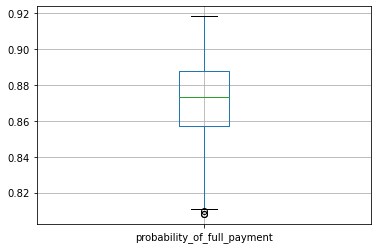

In [15]:
df.boxplot(column=['probability_of_full_payment'])
plt.show()

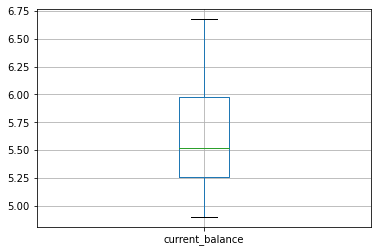

In [16]:
df.boxplot(column=['current_balance'])
plt.show()

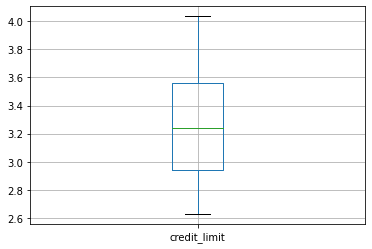

In [17]:
df.boxplot(column=['credit_limit'])
plt.show()

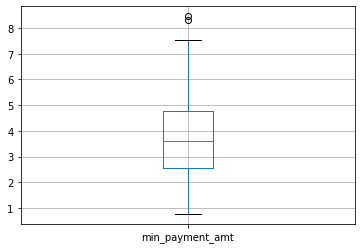

In [18]:
df.boxplot(column=['min_payment_amt'])
plt.show()

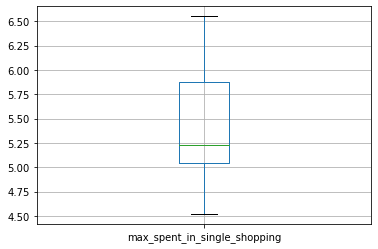

In [19]:
df.boxplot(column=['max_spent_in_single_shopping'])
plt.show()

In [20]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [21]:
df.kurt()

spending                       -1.084266
advance_payments               -1.106703
probability_of_full_payment    -0.140315
current_balance                -0.785645
credit_limit                   -1.097697
min_payment_amt                -0.066603
max_spent_in_single_shopping   -0.840792
dtype: float64

array([[<AxesSubplot:title={'center':'spending'}>,
        <AxesSubplot:title={'center':'advance_payments'}>,
        <AxesSubplot:title={'center':'probability_of_full_payment'}>],
       [<AxesSubplot:title={'center':'current_balance'}>,
        <AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'min_payment_amt'}>],
       [<AxesSubplot:title={'center':'max_spent_in_single_shopping'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

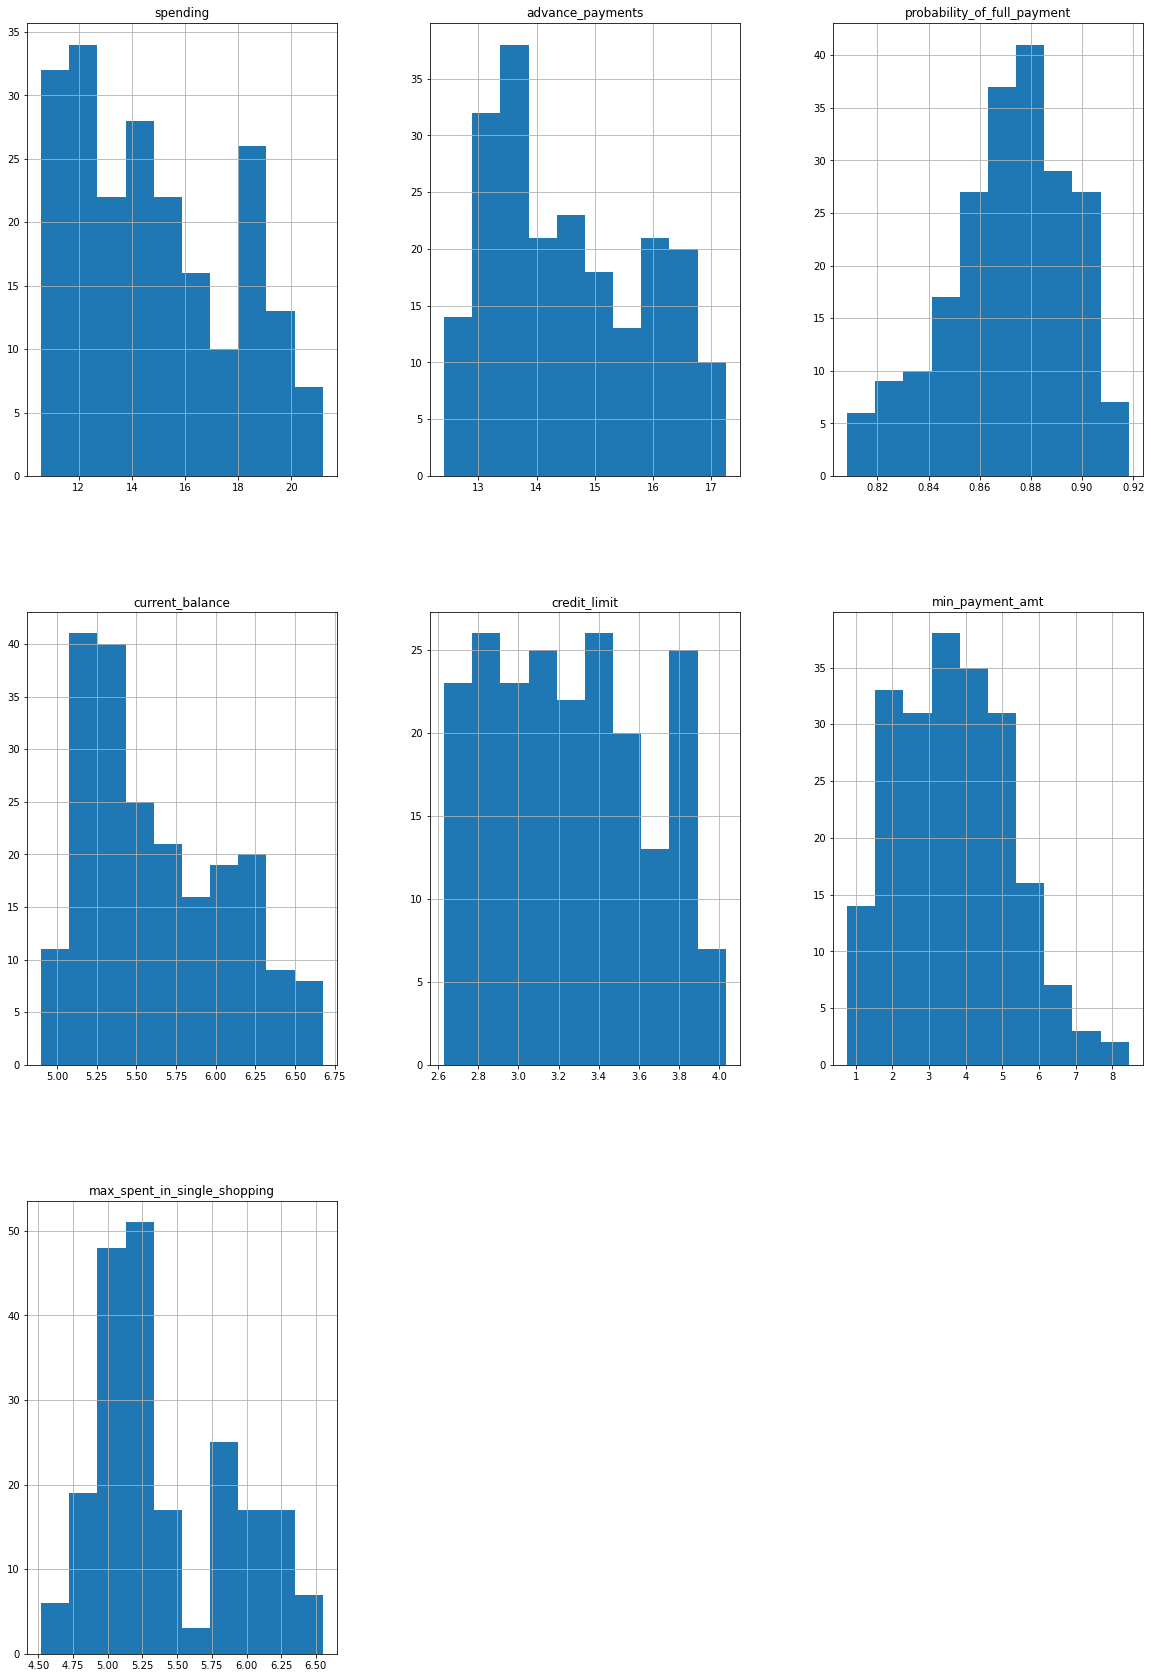

In [22]:
df.hist(figsize=(20,30))

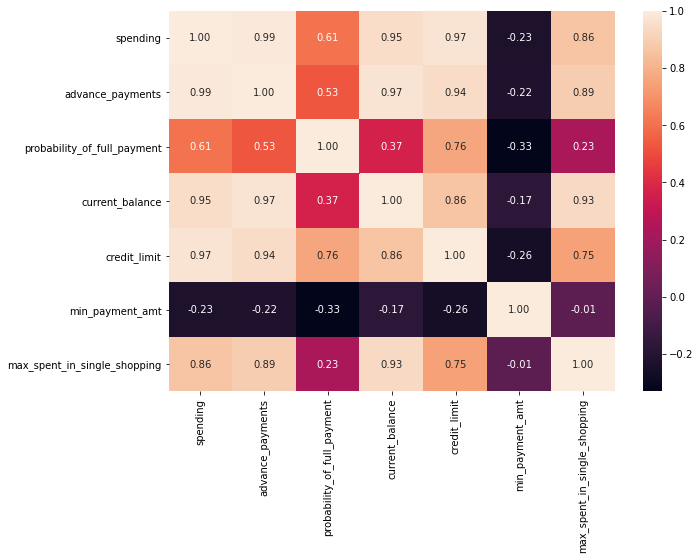

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [24]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


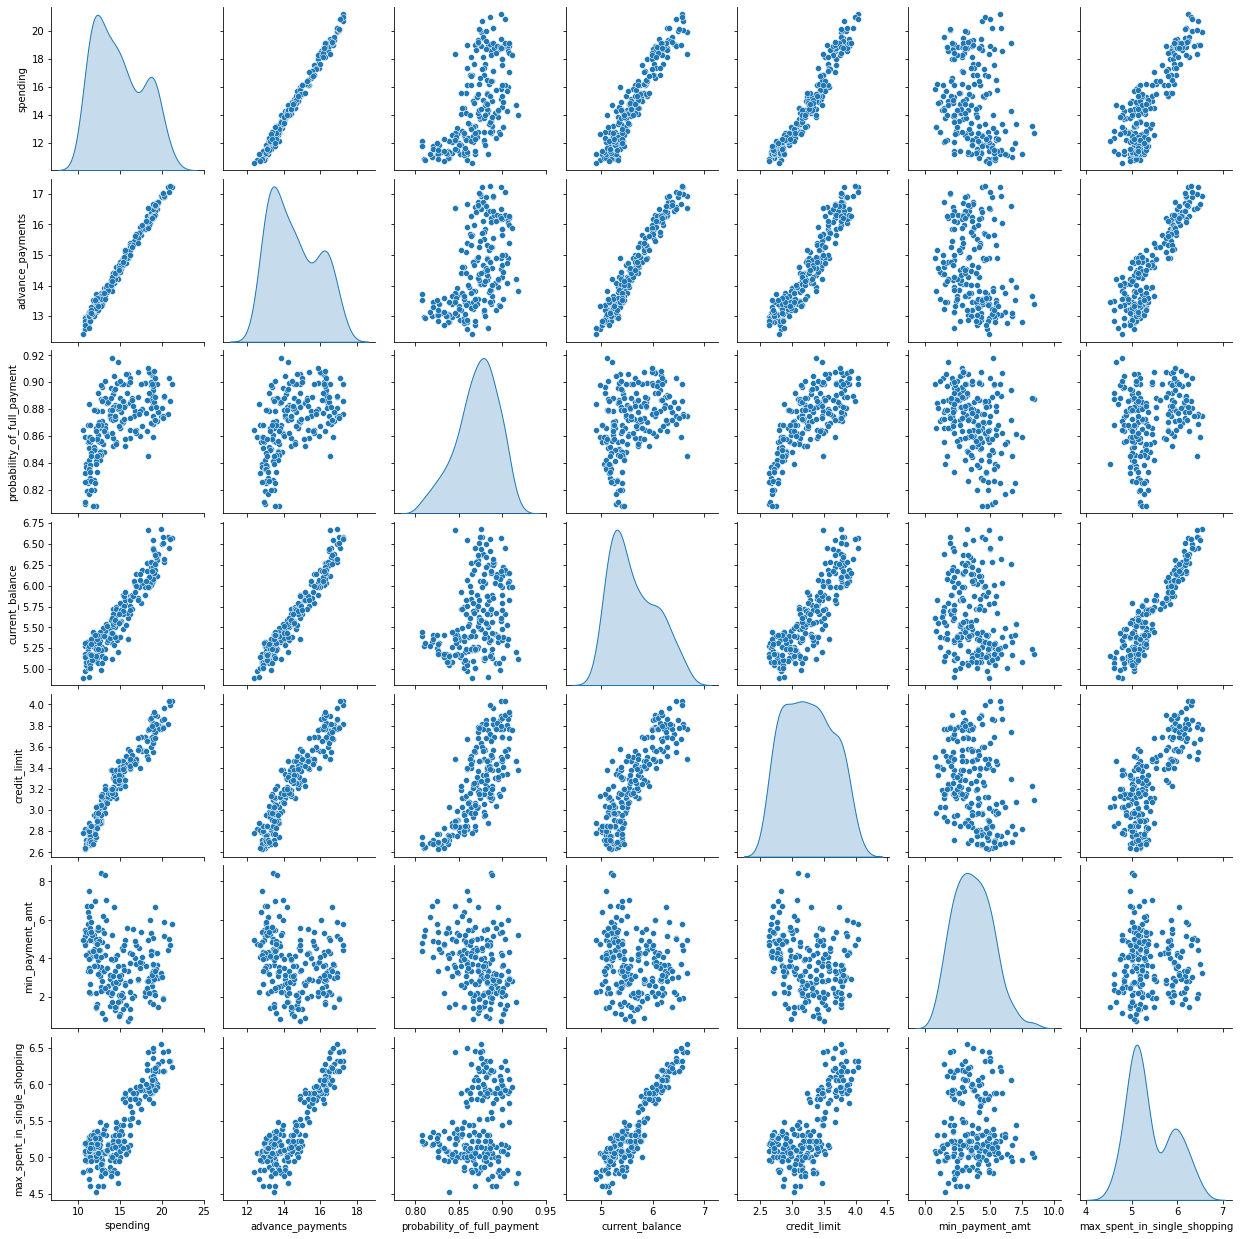

In [25]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [26]:
# spending 

df['spending'].max()-df['spending'].min()

10.59

In [27]:
Q1=df['spending'].quantile(q=0.25)
Q3=df['spending'].quantile(q=0.75)
print('Q1 of spending  is: ', Q1)
print('Q3 of spending  is: ', Q3)
print('IQR of spending is ', stats.iqr(df['spending']))

Q1 of spending  is:  12.27
Q3 of spending  is:  17.305
IQR of spending is  5.035


In [28]:
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in spending is: ', L_ol)
print('Threshold for upper outliers in spending is: ', U_ol)

Threshold for lower outliers in spending is:  4.717499999999999
Threshold for upper outliers in spending is:  24.8575


In [29]:
print('No. of outliers in spending upper : ', df[df['spending']>24.8575]['spending'].count())
print('No. of outliers in spending lower : ', df[df['spending']<4.717499]['spending'].count())

No. of outliers in spending upper :  0
No. of outliers in spending lower :  0


In [30]:
# advance_payments

df['advance_payments'].max()-df['advance_payments'].min()

4.84

In [31]:
Q1=df['advance_payments'].quantile(q=0.25)
Q3=df['advance_payments'].quantile(q=0.75)
print('Q1 of advance_payments  is: ', Q1)
print('Q3 of advance_payments  is: ', Q3)
print('IQR of advance_payments is ', stats.iqr(df['advance_payments']))

Q1 of advance_payments  is:  13.45
Q3 of advance_payments  is:  15.715
IQR of advance_payments is  2.2650000000000006


In [32]:
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in advance_payments is: ', L_ol)
print('Threshold for upper outliers in advance_payments is: ', U_ol)

Threshold for lower outliers in advance_payments is:  10.052499999999998
Threshold for upper outliers in advance_payments is:  19.1125


In [33]:
print('No. of outliers in advance_payments upper : ', df[df['advance_payments']>19.1125]['advance_payments'].count())
print('No. of outliers in advance_payments lower : ', df[df['advance_payments']< 10.052499999999998]['advance_payments'].count())

No. of outliers in advance_payments upper :  0
No. of outliers in advance_payments lower :  0


In [34]:
# probability_of_full_payment
df['probability_of_full_payment'].max()-df['probability_of_full_payment'].min()

0.11019999999999996

In [35]:
Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('Q1 of probability_of_full_payment  is: ', Q1)
print('Q3 of probability_of_full_payment  is: ', Q3)
print('IQR of probability_of_full_payment is ', stats.iqr(df['probability_of_full_payment']))

Q1 of probability_of_full_payment  is:  0.8569
Q3 of probability_of_full_payment  is:  0.887775
IQR of probability_of_full_payment is  0.030874999999999986


In [36]:
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in probability_of_full_payment is: ', L_ol)
print('Threshold for upper outliers in probability_of_full_payment is: ', U_ol)

Threshold for lower outliers in probability_of_full_payment is:  0.8105875
Threshold for upper outliers in probability_of_full_payment is:  0.9340875


In [37]:
print('No. of outliers in probability_of_full_payment upper : ', df[df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count())
print('No. of outliers in probability_of_full_payment lower : ', df[df['probability_of_full_payment']< 0.8105875]['probability_of_full_payment'].count())

No. of outliers in probability_of_full_payment upper :  0
No. of outliers in probability_of_full_payment lower :  3


In [38]:
# current_balance
df['current_balance'].max()-df['current_balance'].min()

1.7759999999999998

In [39]:
Q1=df['current_balance'].quantile(q=0.25)
Q3=df['current_balance'].quantile(q=0.75)
print('Q1 of current_balance  is: ', Q1)
print('Q3 of current_balance  is: ', Q3)
print('IQR of current_balance is ', stats.iqr(df['current_balance']))

Q1 of current_balance  is:  5.26225
Q3 of current_balance  is:  5.97975
IQR of current_balance is  0.7175000000000002


In [40]:
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in current_balance is: ', L_ol)
print('Threshold for upper outliers in current_balance is: ', U_ol)

Threshold for lower outliers in current_balance is:  4.186
Threshold for upper outliers in current_balance is:  7.056000000000001


In [41]:
print('No. of outliers in current_balance upper : ', df[df['current_balance']> 7.056000000000001]['current_balance'].count())
print('No. of outliers in current_balance lower : ', df[df['current_balance']< 4.186]['current_balance'].count())

No. of outliers in current_balance upper :  0
No. of outliers in current_balance lower :  0


In [42]:
# credit_limit                  
df['credit_limit'].max()-df['credit_limit'].min()

1.4030000000000005

In [43]:
Q1=df['credit_limit'].quantile(q=0.25)
Q3=df['credit_limit'].quantile(q=0.75)
print('Q1 of credit_limit  is: ', Q1)
print('Q3 of credit_limit  is: ', Q3)
print('IQR of credit_limit is ', stats.iqr(df['credit_limit']))

Q1 of credit_limit  is:  2.944
Q3 of credit_limit  is:  3.56175
IQR of credit_limit is  0.61775


In [44]:
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in credit_limit is: ', L_ol)
print('Threshold for upper outliers in credit_limit is: ', U_ol)

Threshold for lower outliers in credit_limit is:  2.017375
Threshold for upper outliers in credit_limit is:  4.488375


In [45]:
print('No. of outliers in credit_limit upper : ', df[df['credit_limit']> 4.488375]['credit_limit'].count())
print('No. of outliers in credit_limit lower : ', df[df['credit_limit']<  2.017375]['credit_limit'].count())

No. of outliers in credit_limit upper :  0
No. of outliers in credit_limit lower :  0


In [46]:
# min_payment_amt
df['min_payment_amt'].max()-df['min_payment_amt'].min()
Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('Q1 of min_payment_amt  is: ', Q1)
print('Q3 of min_payment_amt  is: ', Q3)
print('IQR of min_payment_amt is ', stats.iqr(df['min_payment_amt']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in min_payment_amt is: ', L_ol)
print('Threshold for upper outliers in min_payment_amt is: ', U_ol)
print('No. of outliers in min_payment_amt upper : ', df[df['min_payment_amt']>8.079625]['min_payment_amt'].count())
print('No. of outliers in min_payment_amt lower : ', df[df['min_payment_amt']< -0.7493750000000006]['min_payment_amt'].count())

Q1 of min_payment_amt  is:  2.5614999999999997
Q3 of min_payment_amt  is:  4.76875
IQR of min_payment_amt is  2.20725
Threshold for lower outliers in min_payment_amt is:  -0.7493750000000006
Threshold for upper outliers in min_payment_amt is:  8.079625
No. of outliers in min_payment_amt upper :  2
No. of outliers in min_payment_amt lower :  0


In [47]:
# max_spent_in_single_shopping  
df['max_spent_in_single_shopping'].max()-df['max_spent_in_single_shopping'].min()
Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('Q1 of max_spent_in_single_shopping is: ', Q1)
print('Q3 of max_spent_in_single_shopping is: ', Q3)
print('IQR of max_spent_in_single_shopping   is ', stats.iqr(df['max_spent_in_single_shopping']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in max_spent_in_single_shopping   is: ', L_ol)
print('Threshold for upper outliers in max_spent_in_single_shopping   is: ', U_ol)
print('No. of outliers in max_spent_in_single_shopping   upper : ', df[df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count())
print('No. of outliers in max_spent_in_single_shopping   lower : ', df[df['max_spent_in_single_shopping']< 3.796999999999999]['max_spent_in_single_shopping'].count())

Q1 of max_spent_in_single_shopping is:  5.045
Q3 of max_spent_in_single_shopping is:  5.877000000000001
IQR of max_spent_in_single_shopping   is  0.8320000000000007
Threshold for lower outliers in max_spent_in_single_shopping   is:  3.796999999999999
Threshold for upper outliers in max_spent_in_single_shopping   is:  7.125000000000002
No. of outliers in max_spent_in_single_shopping   upper :  0
No. of outliers in max_spent_in_single_shopping   lower :  0


In [48]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [49]:
lrfp,urfp=remove_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>urfp,urfp,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lrfp,lrfp,df['probability_of_full_payment'])

lrmp,urmp=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>urmp,urmp,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lrmp,lrmp,df['min_payment_amt'])

df.shape

(210, 7)

<AxesSubplot:>

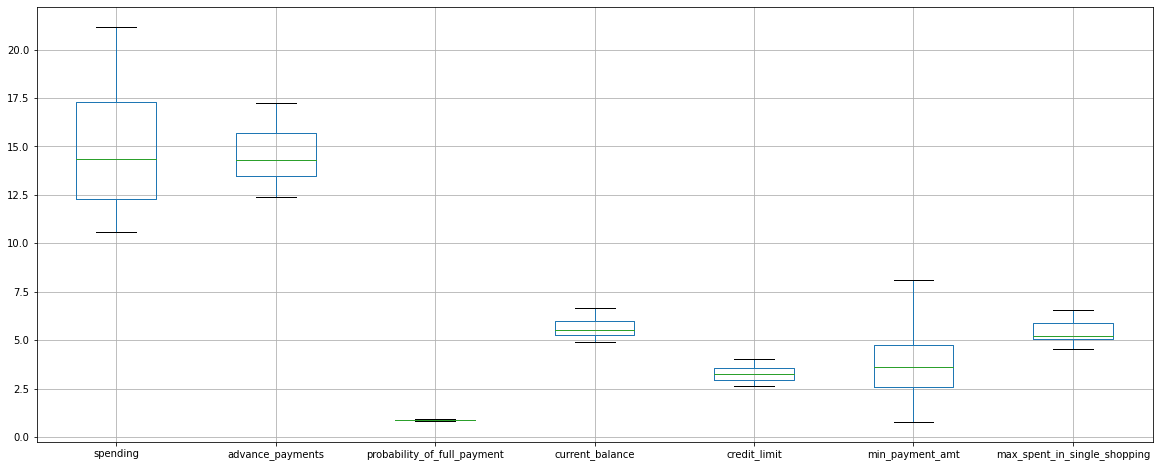

In [50]:
plt.figure(figsize = (20,8))
df.boxplot()

In [51]:
# min_payment_amt
df['min_payment_amt'].max()-df['min_payment_amt'].min()
Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('Q1 of min_payment_amt  is: ', Q1)
print('Q3 of min_payment_amt  is: ', Q3)
print('IQR of min_payment_amt is ', stats.iqr(df['min_payment_amt']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in min_payment_amt is: ', L_ol)
print('Threshold for upper outliers in min_payment_amt is: ', U_ol)
print('No. of outliers in min_payment_amt upper : ', df[df['min_payment_amt']>8.079625]['min_payment_amt'].count())
print('No. of outliers in min_payment_amt lower : ', df[df['min_payment_amt']< -0.7493750000000006]['min_payment_amt'].count())

Q1 of min_payment_amt  is:  2.5614999999999997
Q3 of min_payment_amt  is:  4.76875
IQR of min_payment_amt is  2.20725
Threshold for lower outliers in min_payment_amt is:  -0.7493750000000006
Threshold for upper outliers in min_payment_amt is:  8.079625
No. of outliers in min_payment_amt upper :  0
No. of outliers in min_payment_amt lower :  0


In [52]:
Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('Q1 of probability_of_full_payment  is: ', Q1)
print('Q3 of probability_of_full_payment  is: ', Q3)
print('IQR of probability_of_full_payment is ', stats.iqr(df['probability_of_full_payment']))
L_ol=Q1-1.5*(Q3-Q1)
U_ol=Q3+1.5*(Q3-Q1)
print('Threshold for lower outliers in probability_of_full_payment is: ', L_ol)
print('Threshold for upper outliers in probability_of_full_payment is: ', U_ol)
print('No. of outliers in probability_of_full_payment upper : ', df[df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count())
print('No. of outliers in probability_of_full_payment lower : ', df[df['probability_of_full_payment']< 0.8105875]['probability_of_full_payment'].count())

Q1 of probability_of_full_payment  is:  0.8569
Q3 of probability_of_full_payment  is:  0.887775
IQR of probability_of_full_payment is  0.030874999999999986
Threshold for lower outliers in probability_of_full_payment is:  0.8105875
Threshold for upper outliers in probability_of_full_payment is:  0.9340875
No. of outliers in probability_of_full_payment upper :  0
No. of outliers in probability_of_full_payment lower :  0


In [53]:
df_Scaled=df.apply(zscore)
df_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [54]:
df_Scaled.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.638372e-15,-1.358702e-16,-2.790757e-16,1.554312e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.571391e+00,-1.650501e+00,-1.668209e+00,-1.966425e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-6.009681e-01,-8.286816e-01,-8.349072e-01,-7.616981e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.031721e-01,-2.376280e-01,-5.733534e-02,-6.591519e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.126469e-01,7.945947e-01,8.044956e-01,7.185591e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.011371e+00,2.367533e+00,2.055112e+00,2.938945e+00,2.328998e+00


In [55]:
wardlink = linkage(df_Scaled, method = 'ward')

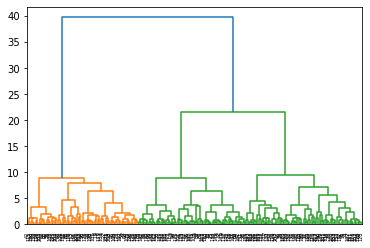

In [56]:
dend = dendrogram(wardlink)

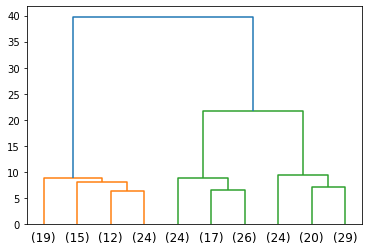

In [57]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10)

In [58]:
from scipy.cluster.hierarchy import fcluster

In [59]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [60]:
clusters_New = df.copy()

In [61]:
clusters_New['clusters'] = clusters

In [62]:
clusters_New.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [63]:
clusters_New['clusters'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [64]:
aggdata_w=clusters_New.groupby('clusters').mean()
aggdata_w['Freq']=clusters_New['clusters'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [65]:
from sklearn.cluster import KMeans 

In [66]:
k_means = KMeans(n_clusters = 3)

In [67]:
k_means.fit(df_Scaled)

KMeans(n_clusters=3)

In [68]:
k_means.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [69]:
k_means.inertia_

430.298481751223

In [70]:
wss =[] 

In [71]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_Scaled)
    wss.append(KM.inertia_)

In [72]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 371.221763926848,
 327.9339240343544,
 289.7914106593793,
 262.7052848976157,
 241.48529685575784,
 222.31262620036242,
 210.03262277770546]

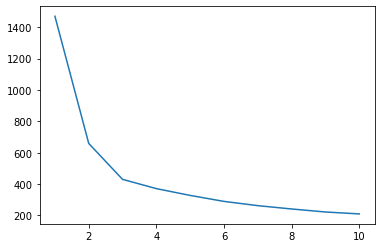

In [73]:
plt.plot(range(1,11), wss)

In [74]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_Scaled)
labels = k_means.labels_

In [75]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,2


In [76]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [77]:
silhouette_score(df_Scaled,labels)


0.4008059221522216

In [78]:
sil_width = silhouette_samples(df_Scaled,labels)

In [79]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,2,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,2,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,2,0.360972


In [80]:
silhouette_samples(df_Scaled,labels).min()

0.002768541128616533

In [81]:
def ClusterPercentage(datafr,name):
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [82]:
ClusterPercentage(clusters_New,"clusters")

,Cluster_Size,Cluster_Percentage
1,70,33.33
2,67,31.90
3,73,34.76


In [83]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [84]:
km_3.fit(df_Scaled)
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [85]:
pd.Series(km_3.labels_).value_counts()

1    72
2    71
0    67
dtype: int64

In [86]:
kmeans1_dataset=df.copy()

In [87]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_Scaled)

In [88]:
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

In [89]:
cluster = pd.DataFrame(y_kmeans1)

In [90]:
kmeans1_dataset['cluster'] = cluster

In [91]:
kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
cluster,,,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0,2,0.5
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1,1,0.4
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1,0,0.3


In [92]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,67,31.90
2,72,34.29
3,71,33.81
